# Performance Python

## Loops

In [1]:
import random

def average_py(n):
    s = 0
    for i in range(n):
        s += random.random()
    return s/n

In [2]:
n = 1000000
%time average_py(n)

CPU times: total: 93.8 ms
Wall time: 85.8 ms


0.4995799653282014

In [3]:
%timeit average_py(n)

84.7 ms ± 2.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
%time sum([random.random() for i in range(n)])/n 

CPU times: total: 109 ms
Wall time: 102 ms


0.4999095324618933

## Numpy

In [5]:
import numpy as np

In [6]:
def average_np(n):
    s = np.random.random(n)
    return s.mean()

In [7]:
%time average_np(n)

CPU times: total: 31.2 ms
Wall time: 9.97 ms


0.5003049801895055

In [8]:
%timeit average_np(n)

7.91 ms ± 493 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Algorithms

## Prime Number

In [9]:
def is_prime(I):
    if I%2 ==0:
        return False
    for i in range(3, int(I**0.5)+1,2):
        if I%i ==0:
            return False
    return True

In [10]:
n = int(1e8 +3)

In [11]:
n

100000003

In [12]:
%time is_prime(n)

CPU times: total: 0 ns
Wall time: 0 ns


False

In [13]:
pi = int(1e8 + 7)

In [14]:
pi

100000007

In [15]:
%time is_prime(pi)

CPU times: total: 0 ns
Wall time: 997 µs


True

In [16]:
p2 = 100109100129162907

In [17]:
p2.bit_length()

57

In [18]:
%time is_prime(p2)

CPU times: total: 12.6 s
Wall time: 12.6 s


True

In [19]:

# import multiprocessing as mp
# pool = mp.Pool(processes=4) 
# %time pool.map(is_prime, 10 * [pi]) 


## Fibonacci Number

In [20]:
def fibo(n):
    if n < 2: return n 
    else:
        return fibo(n-1) + fibo(n-2)

In [21]:
%time fibo(35)

CPU times: total: 2.77 s
Wall time: 2.76 s


9227465

In [22]:
from functools import lru_cache as cache
@cache(maxsize=None) 
def fib_rec_py2(n):
    if n < 2:
         return n
    else:
         return fib_rec_py2(n - 1) + fib_rec_py2(n - 2)

In [23]:
%time fib_rec_py2(80)

CPU times: total: 0 ns
Wall time: 0 ns


23416728348467685

## The Number Pi

In [26]:
import random
import numpy as np
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline


In [27]:
rn = [(random.random()*2-1, random.random()*2-1) for _ in range(500)]

In [34]:
rn = np.array(rn)



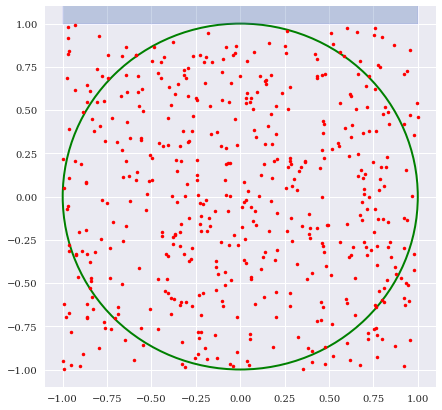

In [37]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
circ = plt.Circle((0,0), radius=1, edgecolor ='g', lw = 2.0, facecolor='None')
box = plt.Rectangle((-1,1),2,3, edgecolor='b', alpha=0.3)
ax.add_patch(circ)
ax.add_patch(box)
plt.plot(rn[:,0], rn[:,1],'r.')
plt.ylim(-1.1, 1.1)
plt.xlim(-1.1,1.1);

## Monte Carlo Simulation

In [39]:
M = 10
I = 50000

def msc_simulation_py(p):
    M, I = p
    dt = T/M
    S = np.zeros((M + 1, I))
    S[0] = S0
    rn = np.random.standard_normal(S.shape)
    for t in range(i, M + 1):
        for i in range(I):
            S[t,i] = [t-1+i]*math.exp((r-sigma **2/2) *dt +
                                     sigma *math.sqrt(dt)*rn[t,i])
            return S

In [78]:
import os
import random
import numpy as np
import pandas as pd
from pylab import mpl, plt
import pandas_datareader.data as web
data = web.DataReader('WIPRO.NS', 'yahoo', '2016-01-01','2022-09-30')

In [84]:
alpha = 0.25

In [95]:
data['EWMA'] = data['Close']

In [75]:
data = data['Close']

In [96]:
data.head()

,High,Low,Open,Close,Volume,Adj Close,EWMA
Date,,,,,,,
2016-01-01,209.925049,207.787552,209.925049,208.668808,1582762.0,200.972626,208.668808
2016-01-04,210.000046,208.500046,208.875046,209.137558,1715818.0,201.424072,209.137558
2016-01-05,211.875046,207.843796,210.750046,208.837555,2343764.0,201.135117,208.837555
2016-01-06,209.925049,207.375046,208.875046,208.162552,3061769.0,200.485046,208.162552
2016-01-07,209.043808,205.162552,207.375046,206.193802,5584145.0,198.588867,206.193802


In [100]:
for t in range(len(data)):
    data.loc[data.index[t],'EWMA'] = (
        alpha*data.loc[data.index[t],'Close'] + (1-alpha)*data.loc[data.index[t], 'EWMA'])

In [101]:
data.head()

,High,Low,Open,Close,Volume,Adj Close,EWMA
Date,,,,,,,
2016-01-01,209.925049,207.787552,209.925049,208.668808,1582762.0,200.972626,208.668808
2016-01-04,210.000046,208.500046,208.875046,209.137558,1715818.0,201.424072,209.137558
2016-01-05,211.875046,207.843796,210.750046,208.837555,2343764.0,201.135117,208.837555
2016-01-06,209.925049,207.375046,208.875046,208.162552,3061769.0,200.485046,208.162552
2016-01-07,209.043808,205.162552,207.375046,206.193802,5584145.0,198.588867,206.193802


<AxesSubplot:xlabel='Date'>

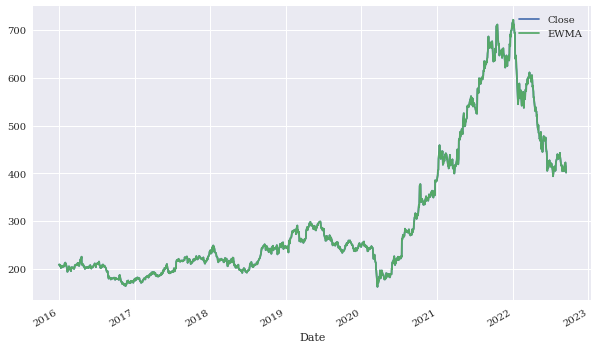

In [99]:
data[['Close','EWMA']].plot(figsize=(10,6))